In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('music_genre.csv')
print(f'Dataset size is: {len(df)} Rows, {len(df.columns)} Columns')
print(f'Columns are:{df.columns}')

Dataset size is: 50005 Rows, 18 Columns
Columns are:Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre'],
      dtype='object')


In [3]:
columns = ['popularity',
               'acousticness', 'danceability', 'duration_ms', 'energy',
               'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
               'speechiness', 'tempo', 'valence', 'music_genre']
df = df[columns]
df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,0.330,Hip-Hop
50001,72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,0.113,Hip-Hop
50002,51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,0.395,Hip-Hop
50003,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,0.354,Hip-Hop


In [4]:
df = df.dropna()
df = df[(df['duration_ms']>0) & (df['loudness']<0) & (df['valence']>0)]
df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce')
df = df.dropna()
df['tempo'] = df['tempo'].round(2)
df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
1,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.00,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.99,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.01,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.04,0.323,Electronic
6,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.106,-4.294,Major,0.3510,150.00,0.230,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49999,56.0,0.13300,0.849,237667.0,0.660,0.000008,C,0.296,-7.195,Major,0.0516,99.99,0.629,Hip-Hop
50001,72.0,0.15700,0.709,251860.0,0.362,0.000000,B,0.109,-9.814,Major,0.0550,122.04,0.113,Hip-Hop
50002,51.0,0.00597,0.693,189483.0,0.763,0.000000,D,0.143,-5.443,Major,0.1460,131.08,0.395,Hip-Hop
50003,65.0,0.08310,0.782,262773.0,0.472,0.000000,G,0.106,-5.016,Minor,0.0441,75.89,0.354,Hip-Hop


In [5]:
encode = ['key', 'mode', 'music_genre']
label_encoder = LabelEncoder()
for col in encode:
    df[col] = label_encoder.fit_transform(df[col])
df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
1,31.0,0.01270,0.622,218293.0,0.890,0.950000,5,0.124,-7.043,1,0.0300,115.00,0.531,5
2,28.0,0.00306,0.620,215613.0,0.755,0.011800,11,0.534,-4.617,0,0.0345,127.99,0.333,5
3,34.0,0.02540,0.774,166875.0,0.700,0.002530,4,0.157,-4.498,0,0.2390,128.01,0.270,5
4,32.0,0.00465,0.638,222369.0,0.587,0.909000,9,0.157,-6.266,0,0.0413,145.04,0.323,5
6,46.0,0.02890,0.572,214408.0,0.803,0.000008,2,0.106,-4.294,0,0.3510,150.00,0.230,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49999,56.0,0.13300,0.849,237667.0,0.660,0.000008,3,0.296,-7.195,0,0.0516,99.99,0.629,6
50001,72.0,0.15700,0.709,251860.0,0.362,0.000000,2,0.109,-9.814,0,0.0550,122.04,0.113,6
50002,51.0,0.00597,0.693,189483.0,0.763,0.000000,5,0.143,-5.443,0,0.1460,131.08,0.395,6
50003,65.0,0.08310,0.782,262773.0,0.472,0.000000,10,0.106,-5.016,1,0.0441,75.89,0.354,6


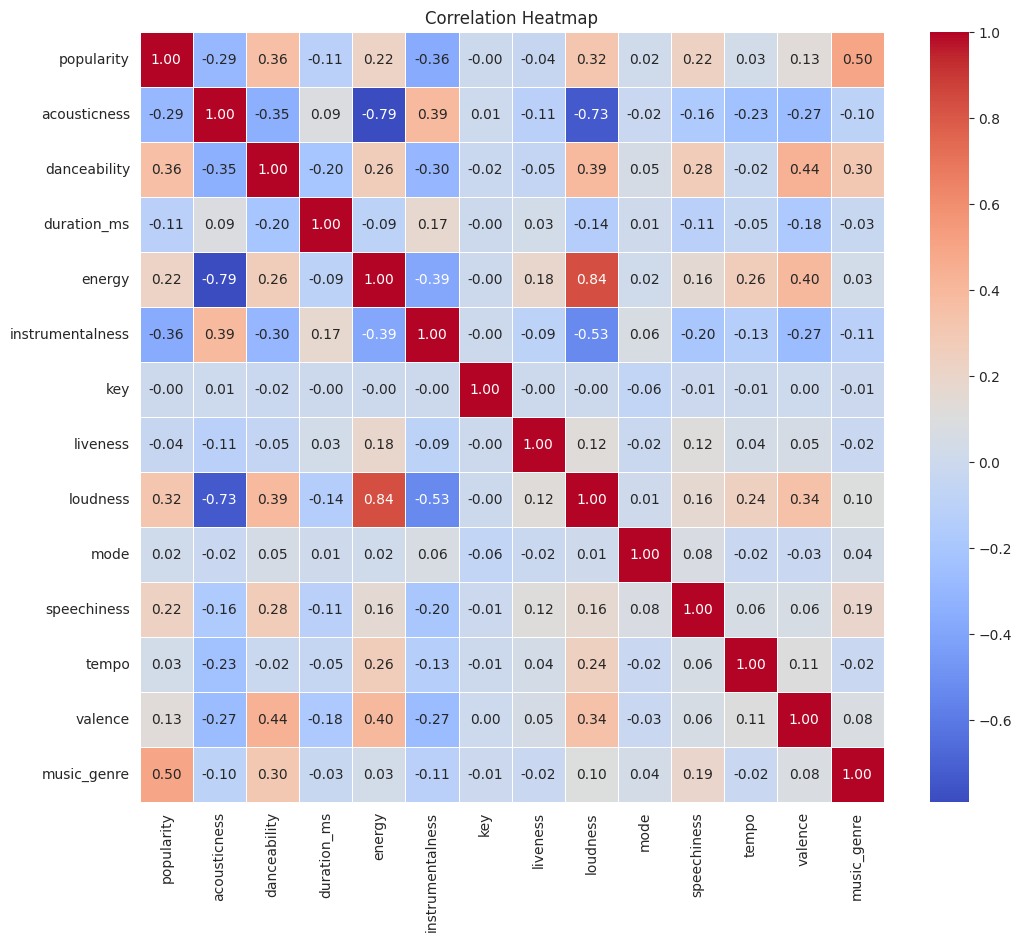

In [6]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

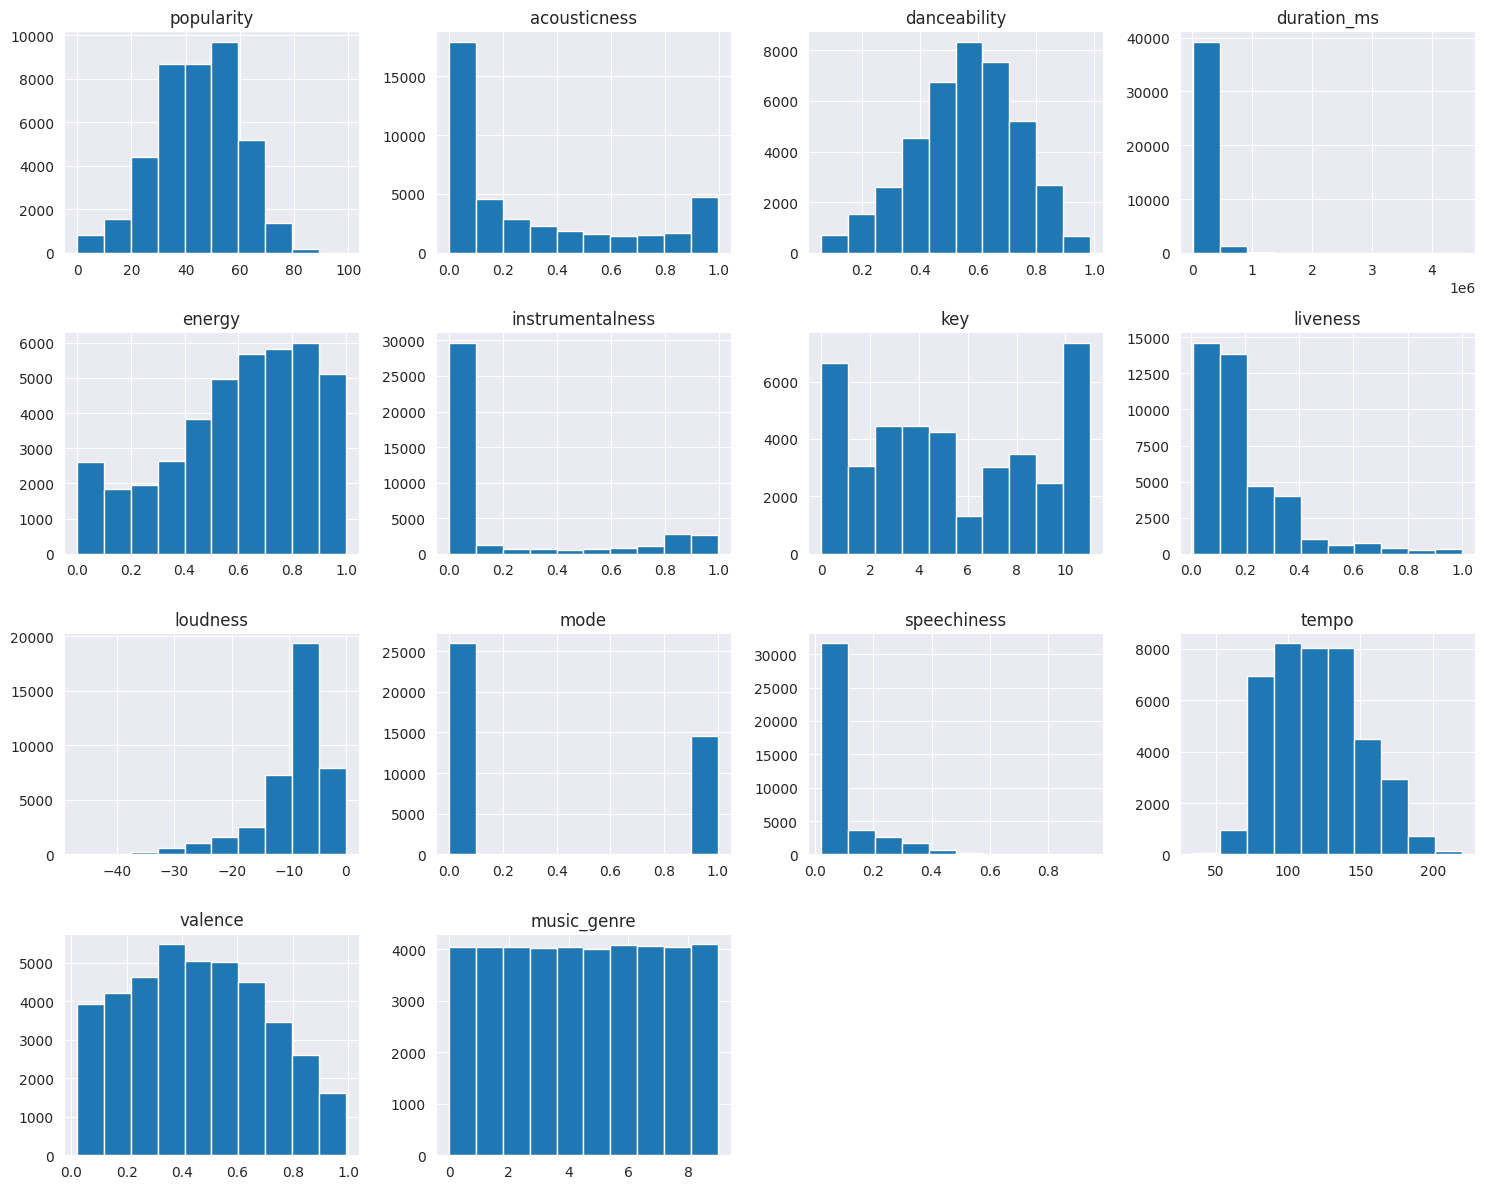

In [7]:
df.hist(figsize=(15, 12))
plt.tight_layout()
plt.show()

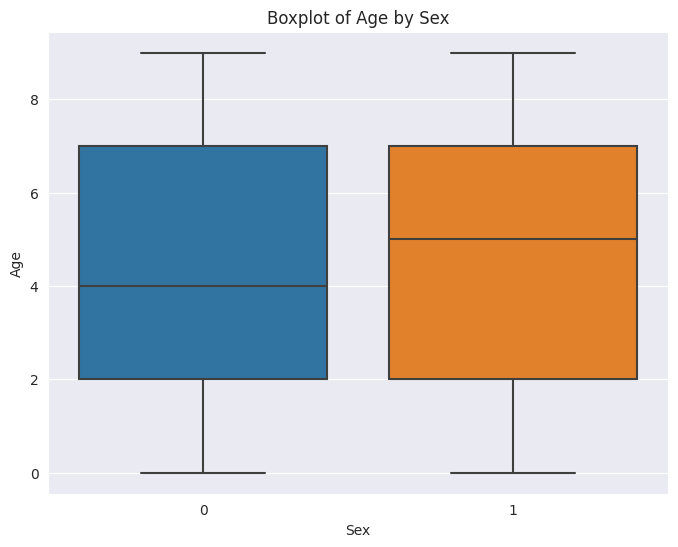

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='mode', y='music_genre', data=df)
plt.title('Boxplot of Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

In [9]:
columns_to_normalize = ['popularity',
'acousticness', 'danceability', 'duration_ms', 'energy',
'instrumentalness', 'liveness', 'loudness',
'speechiness', 'valence']
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
1,0.313131,0.012751,0.607081,0.045239,0.890804,0.953815,5,0.115446,0.850766,1,0.008372,115.00,0.525476,5
2,0.282828,0.003072,0.604922,0.044641,0.755562,0.011847,11,0.529450,0.902361,0,0.013265,127.99,0.321668,5
3,0.343434,0.025502,0.771157,0.033768,0.700463,0.002540,4,0.148769,0.904892,0,0.235620,128.01,0.256819,5
4,0.323232,0.004669,0.624352,0.046149,0.587260,0.912651,9,0.148769,0.867291,0,0.020659,145.04,0.311374,5
6,0.464646,0.029016,0.553109,0.044372,0.803648,0.000008,2,0.097271,0.909230,0,0.357399,150.00,0.215646,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49999,0.565657,0.133534,0.852116,0.049561,0.660391,0.000008,3,0.289126,0.847533,0,0.031858,99.99,0.626351,6
50001,0.727273,0.157631,0.700993,0.052728,0.361856,0.000000,2,0.100300,0.791833,0,0.035555,122.04,0.095214,6
50002,0.515152,0.005994,0.683722,0.038812,0.763576,0.000000,5,0.134632,0.884794,0,0.134500,131.08,0.385486,6
50003,0.656566,0.083434,0.779793,0.055162,0.472054,0.000000,10,0.097271,0.893875,1,0.023703,75.89,0.343284,6


In [10]:
features = ['popularity',
            'acousticness', 'danceability', 'duration_ms', 'energy',
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
            'speechiness', 'tempo', 'valence']

# Features (X) and target (y) variables
X = df[features]
y = df['music_genre']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the kNN classifier
for n in [5, 15, 25, 50, 150, 1000]:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)

    # Predict 'Sex' for the testing set
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy:{accuracy}, for {n} nearest neighbours')

Accuracy:0.2633267522211254, for 5 nearest neighbours
Accuracy:0.26554787759131293, for 15 nearest neighbours
Accuracy:0.27184106614017767, for 25 nearest neighbours
Accuracy:0.2690029615004936, for 50 nearest neighbours
Accuracy:0.2295162882527147, for 150 nearest neighbours
Accuracy:0.1647334649555775, for 1000 nearest neighbours


In [11]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.4396594274432379


In [17]:
sampled_df = df.sample(frac=0.01, random_state=42)
sampled_X = sampled_df[features]
sampled_y = sampled_df['music_genre']

# Split the dataset into training and testing sets
sampled_X_train, sampled_X_test, sampled_y_train, sampled_y_test = train_test_split(sampled_X, sampled_y, test_size=0.2, random_state=42)



param_grid = {
    'C': [0.1, 1, 10, 100],  # Possible values for C
    'gamma': [0.01, 0.1, 1, 10],  # Possible values for gamma
    'kernel': ['linear', 'rbf']  # Possible values for kernel
}
# Initialize the SVM classifier
svm_classifier = SVC(random_state=42)

# Initialize GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svm_classifier, param_grid, cv=3, scoring='accuracy')

# Fit the model to the data
grid_search.fit(sampled_X_train, sampled_y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Predict 'music_genre' for the testing set using the best model
best_svm_classifier = grid_search.best_estimator_
sampled_y_pred = best_svm_classifier.predict(sampled_X_test)

# Calculate accuracy
accuracy = accuracy_score(sampled_y_test, sampled_y_pred)
print('Accuracy:', accuracy)

Best Hyperparameters:
{'C': 100, 'gamma': 0.01, 'kernel': 'linear'}
Accuracy: 0.4567901234567901


In [28]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.5583662388943732


In [27]:
adaboost_classifier = AdaBoostClassifier(random_state=42)
adaboost_classifier.fit(X_train, y_train)
y_pred = adaboost_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.48445212240868707


In [20]:
svm_classifier = SVC(C=100, gamma=0.01, kernel='rbf', random_state=42)
svm_classifier.fit(sampled_X_train, sampled_y_train)

y_pred = svm_classifier.predict(sampled_X_test)

# Calculate and print classification report
print("Classification Report:")
print(classification_report(sampled_y_test, y_pred))

# Calculate and print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(sampled_y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.22      0.21         9
           1       0.40      0.29      0.33         7
           2       0.17      0.14      0.15         7
           3       0.73      0.62      0.67        13
           4       0.23      0.33      0.27         9
           5       0.00      0.00      0.00         6
           6       0.17      0.25      0.20         4
           7       0.43      0.38      0.40         8
           8       0.43      0.38      0.40         8
           9       0.00      0.00      0.00        10

    accuracy                           0.28        81
   macro avg       0.27      0.26      0.26        81
weighted avg       0.31      0.28      0.29        81

Confusion Matrix:
[[2 0 0 1 3 0 1 0 0 2]
 [2 2 1 0 0 1 1 0 0 0]
 [1 0 1 0 0 3 1 0 0 1]
 [0 1 2 8 0 0 0 1 0 1]
 [0 2 1 0 3 0 1 0 1 1]
 [0 0 0 1 3 0 0 0 0 2]
 [0 0 0 0 1 0 1 1 1 0]
 [1 0 0 1 0 1 1 3 1 0]
 [2 0 0 0 0 1 0 